The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.

Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images (42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network.

* The name of the dataset is SVHN_single_grey1.h5
* The data is a subset of the original dataset. Use this subset only for the project.

#### 1.Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) (2.5 points)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import h5py

h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/GreatLearning/SVHN_single_grey1.h5', 'r')
for key in h5f.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

h5f.close()

In [4]:
print('Training set', x_train.shape, y_train.shape)
print('Validation set', x_val.shape, y_val.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Label: 6


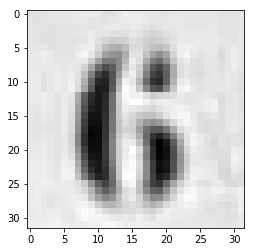

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(x_train[1000], cmap='gray')

#### 2.Data fetching and understand the train/val/test splits (2.5 points)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

x_train = x_train/255
x_test = x_test/255

In [9]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


#### 3.Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [11]:
x_train_knn=[]
for i in range(x_train.shape[0]):
  x_train_knn.append(np.array(x_train[i]).flatten())

42000


42000

In [12]:
x_test_knn=[]
for i in range(x_test.shape[0]):
  x_test_knn.append(np.array(x_test[i]).flatten())

18000

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 1, weights = 'distance')
knn.fit(x_train_knn, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [0]:
y_predict = knn.predict(x_test_knn)

In [16]:
knn.score(x_train_knn, y_train)

1.0

In [0]:
knn.score(x_test_knn, y_test)

#### 4.Print the classification metric report (2.5 points)

In [0]:
from sklearn import metrics

metrics.classification_report(y_test, y_predict)

#### 5.Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D

dnn = Sequential()
dnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dnn.add(Dropout(0.25))
dnn.add(MaxPool2D(pool_size=(2,2)))

dnn.add(Flatten())
dnn.add(Dense(128, activation='relu'))
dnn.add(Dropout(0.5))
dnn.add(Dense(10, activation='softmax'))

#### 6.Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [16]:
dnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=30, nb_epoch=10, validation_data=(x_test, y_test), callbacks=[es])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 230us/step - loss: 2.2950 - acc: 0.1325 - val_loss: 2.2736 - val_acc: 0.2276
Epoch 2/10
42000/42000 [==============================] - 7s 165us/step - loss: 2.0430 - acc: 0.2874 - val_loss: 1.7057 - val_acc: 0.5178
Epoch 3/10
42000/42000 [==============================] - 7s 162us/step - loss: 1.6040 - acc: 0.4637 - val_loss: 1.3465 - val_acc: 0.6374
Epoch 4/10
42000/42000 [==============================] - 7s 163us/step - loss: 1.3709 - acc: 0.5527 - val_loss: 1.1423 - val_acc: 0.7002
Epoch 5/10
42000/42000 [==============================] - 7s 163us/step - loss: 1.1995 - acc: 0.6183 - val_loss: 0.9842 - val_acc: 0.7435
Epoch 6/10
42000/42000 [==============================] - 7s 161us/step - loss: 1.0790 - acc: 0.6604 - val_loss: 0.9008 - val_acc: 0.7594
Epoch 7/10
42000/42000 [==============================] - 7s 160us/step - loss: 0.9730 - acc: 0.6989 - val_loss: 0.7921 -

In [17]:
dnn.evaluate(x_test, y_test)

18000/18000 [==============================] - 1s 59us/step


[0.5878874742719862, 0.8500555555555556]

#### 7.Implement batch normalization for training the neural network (2.5 points)

In [0]:
from keras.layers import BatchNormalization

dnn = Sequential()
dnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.25))
dnn.add(MaxPool2D(pool_size=(2,2)))

dnn.add(Flatten())
dnn.add(Dense(128, activation='relu'))
dnn.add(BatchNormalization())
dnn.add(Dropout(0.5))
dnn.add(Dense(10, activation='softmax'))

In [20]:
dnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=30, nb_epoch=10, validation_data=(x_test, y_test), callbacks=[es])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 253us/step - loss: 0.5895 - acc: 0.8166 - val_loss: 0.5986 - val_acc: 0.8581
Epoch 2/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.4697 - acc: 0.8510 - val_loss: 0.5216 - val_acc: 0.8707
Epoch 3/10
42000/42000 [==============================] - 10s 237us/step - loss: 0.3984 - acc: 0.8754 - val_loss: 0.4405 - val_acc: 0.8864
Epoch 4/10
42000/42000 [==============================] - 10s 236us/step - loss: 0.3640 - acc: 0.8872 - val_loss: 0.3694 - val_acc: 0.8906
Epoch 5/10
42000/42000 [==============================] - 10s 241us/step - loss: 0.3471 - acc: 0.8912 - val_loss: 2.9846 - val_acc: 0.6294
Epoch 6/10
42000/42000 [==============================] - 10s 238us/step - loss: 0.3344 - acc: 0.8949 - val_loss: 0.6165 - val_acc: 0.8701
Epoch 7/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.3327 - acc: 0.8964 - val_loss: 0.

In [21]:
dnn.evaluate(x_test, y_test)

18000/18000 [==============================] - 1s 70us/step


[0.36781128578715855, 0.899]

#### 8.Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [0]:
The CNN acurracy is high compared to KNN. CNN extracts features through convolution layer whereas KNN processes 
the one dimensional pixel array data. Time and memory required to run KNN is too expensive compared to CNN. 